In [482]:
import numpy as np
import pandas as pd
file = open('tbbt.txt', 'r')
text = file.read()
file.close()

In [483]:
dicc = {}
k =[]
v = []
ids = []
for t, i in enumerate(text.split('\n')):
    sp = i.split(':')
    ids.append(t)
    k.append(sp[0])
    v.append(sp[1])

In [484]:
krep = list(zip(ids, k, v))

In [486]:
import sqlite3
 
conn = sqlite3.connect("Shows.db") 
cursor = conn.cursor()

cursor.execute("""CREATE TABLE TheBigBangTheory
                  (id, label, text)
               """)

In [488]:
cursor.executemany("INSERT INTO TheBigBangTheory VALUES (?,?,?)", krep)
conn.commit()

In [489]:
conn = sqlite3.connect("Shows.db")
data_tbt = pd.read_sql_query("select * from TheBigBangTheory;", conn)

In [513]:
data_tbt = pd.read_sql_query("select * from TheBigBangTheory;", conn)

In [514]:
data_tbt.head()

,id,label,text
0,0,Sheldon,It’s not what it looks like. It’s not what it...
1,1,Leonard,What are you grinding about?
2,2,Sheldon,Penny’s brain teaser this morning. She and Ko...
3,3,Leonard,"Just let it go, Sheldon."
4,4,Sheldon,"If I could, I would, but I can’t, so I shan’t..."


In [630]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Visualization

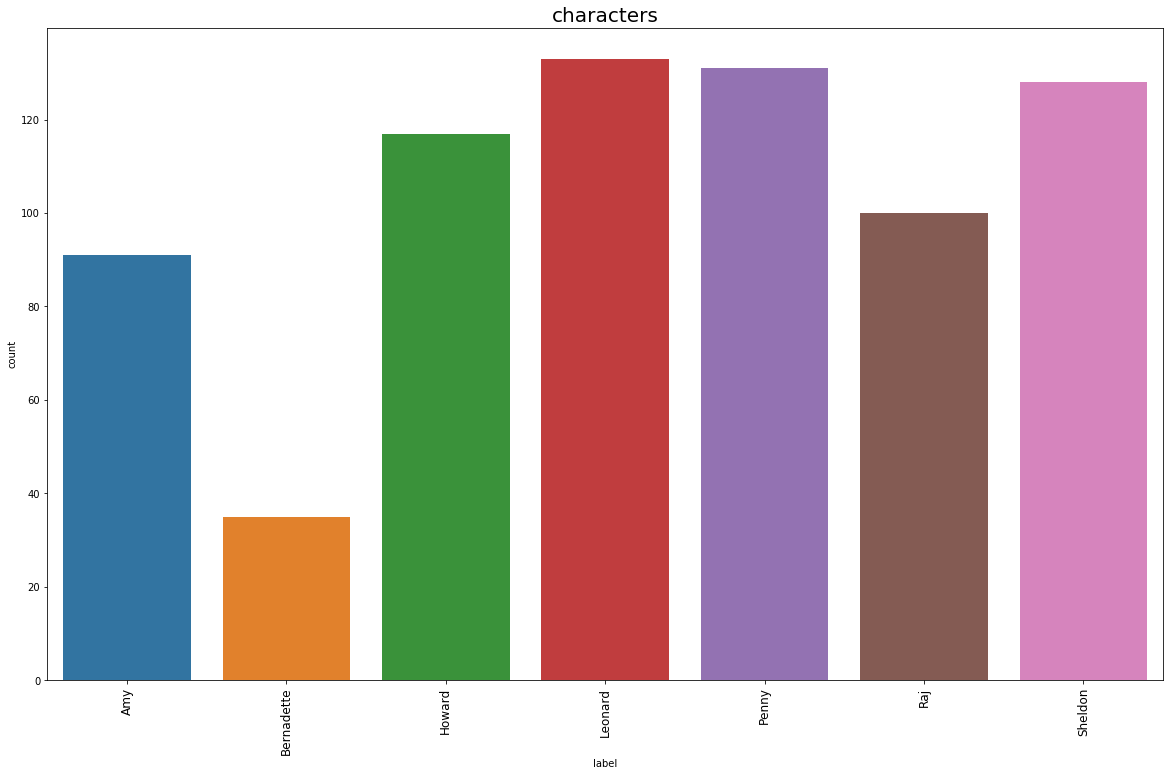

In [631]:
plt.figure(figsize=(20,12))
sns.countplot(data_tbt['label'].sort_values())
plt.title("characters",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [515]:
quest = []
for i in data_tbt['text']:
    if '?' in i:
        quest.append(1)
    else:
        quest.append(0)

In [516]:
data_tbt['question'] = quest

In [517]:
import nltk
from nltk import sent_tokenize

In [518]:
sents = []
for i in data_tbt['text']:
    sent_ = nltk.sent_tokenize(i)
    sents.append(len(sent_))

In [519]:
data_tbt['sent_number'] = sents

In [520]:
data_tbt.head()

,id,label,text,question,sent_number
0,0,Sheldon,It’s not what it looks like. It’s not what it...,0,2
1,1,Leonard,What are you grinding about?,1,1
2,2,Sheldon,Penny’s brain teaser this morning. She and Ko...,0,4
3,3,Leonard,"Just let it go, Sheldon.",0,1
4,4,Sheldon,"If I could, I would, but I can’t, so I shan’t...",1,13


# Preprocessing

In [521]:
from spacy.lang.en.stop_words import STOP_WORDS
import re
import spacy

In [522]:
nlp = spacy.load('en',disable=['parser', 'ner', 'textcat'])

def reduce_to_double_max(text):
    text = re.sub(r'(\w)\1{2,}', r'\1\1', text)
    return re.sub(r'(\W)\1+', r'\1', text)
def preprocess_corpus(corpus):
    data_pro = []
    data_ = []
    corpus = (reduce_to_double_max(s.lower()) for s in corpus)
    docs = nlp.pipe(corpus, batch_size=1000, n_threads=4)
    return [[x.lemma_ for x in doc if x.is_alpha and not x.is_stop] for doc in docs]

In [523]:
data_pro = preprocess_corpus(data_tbt['text'])

In [524]:
data_tbt['text'] = data_pro

In [525]:
data_tbt.head()

,id,label,text,question,sent_number
0,0,Sheldon,"[look, like, look, like]",0,2
1,1,Leonard,[grind],1,1
2,2,Sheldon,"[penny, brain, teaser, morning, koothrappali, ...",0,4
3,3,Leonard,"[let, sheldon]",0,1
4,4,Sheldon,"[shall, know, penny, obvious, answer, engage, ...",1,13


In [526]:
token_len = []
for i in data_tbt['text']:
    token_len.append(len(i))

In [527]:
data_tbt['token_number'] = token_len

In [528]:
data_tbt.head()

,id,label,text,question,sent_number,token_number
0,0,Sheldon,"[look, like, look, like]",0,2,4
1,1,Leonard,[grind],1,1,1
2,2,Sheldon,"[penny, brain, teaser, morning, koothrappali, ...",0,4,15
3,3,Leonard,"[let, sheldon]",0,1,2
4,4,Sheldon,"[shall, know, penny, obvious, answer, engage, ...",1,13,49


In [529]:
whole_verb = []
for i in data_tbt['text']:
    verbs = []
    doc = nlp(' '.join(i))
    for s in doc:
        verbs.append(s.pos_)
    whole_verb.append(verbs)

In [530]:
verb_count = []
for i, x in enumerate(whole_verb):
    verb_count.insert(i, x.count('VERB'))

In [531]:
data_tbt['verb_number'] = verb_count

In [532]:
data_tbt.head()

,id,label,text,question,sent_number,token_number,verb_number
0,0,Sheldon,"[look, like, look, like]",0,2,4,2
1,1,Leonard,[grind],1,1,1,1
2,2,Sheldon,"[penny, brain, teaser, morning, koothrappali, ...",0,4,15,3
3,3,Leonard,"[let, sheldon]",0,1,2,2
4,4,Sheldon,"[shall, know, penny, obvious, answer, engage, ...",1,13,49,9


In [637]:
vecs = pd.DataFrame(index = data_tbt.index, columns = [d for d in range(128)])
vecs.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [638]:
for i, t in enumerate(data_tbt['text']): 
    t_vec = (nlp(' '.join(t))).vector # векторизуем текст
    if t_vec.shape == (0,):
        vecs.values[i] = np.array(0)*128 # заменяем строчки на вектор
    else:
        vecs.values[i] = t_vec

In [640]:
data_new = pd.concat([data_tbt.drop(['text'], axis = 1), vecs], axis=1)

In [641]:
data_new.head()

,id,label,question,sent_number,token_number,verb_number,0,1,2,3,...,118,119,120,121,122,123,124,125,126,127
0,0,Sheldon,0,2,4,2,2.96365,-0.566775,1.00098,0.451432,...,0.732542,-0.28111,4.2614,0.0570422,-0.0023995,-0.981146,-0.460228,1.25648,-0.796368,-0.435367
1,1,Leonard,1,1,1,1,0.354289,0.261622,2.52276,-1.71967,...,2.47453,1.1445,3.38133,2.44787,1.21138,0.18246,-1.93527,1.14494,4.05326,-1.06251
2,2,Sheldon,0,4,15,3,0.731979,0.363962,0.252169,0.00546308,...,2.08969,0.444882,1.89342,1.0534,0.795524,0.517677,1.31697,-0.607077,2.6591,-2.62316
3,3,Leonard,0,1,2,2,-0.248104,0.477245,3.15916,1.41339,...,1.0226,0.757894,2.38013,2.08806,1.78191,-2.44701,-3.18553,-0.775667,1.47726,-1.57177
4,4,Sheldon,1,13,49,9,0.314938,0.440362,0.314906,0.327243,...,1.5133,0.142645,1.53841,0.405505,1.81746,0.424581,1.28393,-0.432487,2.28994,-1.77956


# Machine Learning 

In [600]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new.drop(['label'], axis = 1), data_new['label'], test_size=0.33, random_state=42)

In [601]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
train_class = encoder.transform(y_train)
test_class = encoder.transform(y_test)
dict(enumerate(encoder.classes_))

{0: 'Amy',
 1: 'Bernadette',
 2: 'Howard',
 3: 'Leonard',
 4: 'Penny',
 5: 'Raj',
 6: 'Sheldon'}

In [642]:
x_all = data_new.drop('label', axis=1)
y_all = data_new['label']

In [ ]:
x_train

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_class, y_pred))
print("Precision:",metrics.precision_score(test_class, y_pred, average='macro'))
print("Recall:",metrics.recall_score(test_class, y_pred, average='macro'))
print ('F1:', metrics.f1_score(test_class, y_pred, average='macro'))

In [621]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score

In [622]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

In [646]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit (x_train, train_class)
y_pred_log=logreg.predict(x_test)

In [660]:
lg_scores = cross_val_score(logreg, x_all, y_all, cv=rkf, scoring='accuracy')
lg_scores2 = cross_val_score(logreg, x_all, y_all, cv=rkf, scoring='recall_macro')
lg_scores3 = cross_val_score(logreg, x_all, y_all, cv=rkf, scoring='precision_macro')
lg_scores4 = cross_val_score(logreg, x_all, y_all, cv=rkf, scoring='f1_macro')

In [663]:
print(lg_scores.mean())
print(lg_scores2.mean())
print(lg_scores3.mean())
print(lg_scores4.mean())

0.22911564625850342
0.2099023760669617
0.21330763114168538
0.20462855075973657


In [606]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_class, y_pred_log)
cnf_matrix

array([[ 6,  0,  4,  2,  1,  4,  3],
       [ 2,  0,  1,  3,  1,  4,  0],
       [ 4,  1,  6,  9,  8,  5,  3],
       [ 4,  2,  3, 12,  7,  6,  5],
       [ 7,  1, 12, 13, 10,  6,  4],
       [ 6,  0,  6,  8,  8,  2,  3],
       [13,  0,  1,  4, 11,  7, 15]])

In [607]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
list(dict(enumerate(encoder.classes_)).values())

['Amy', 'Bernadette', 'Howard', 'Leonard', 'Penny', 'Raj', 'Sheldon']

In [610]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier(n_estimators=50)
rdf.fit(x_train, train_class)
y_pred_rnf=rdf.predict(x_test)

In [664]:
rf_scores = cross_val_score(rdf, x_all, y_all, cv=rkf, scoring='accuracy')
rf_scores2 = cross_val_score(rdf, x_all, y_all, cv=rkf, scoring='recall_macro')
rf_scores3 = cross_val_score(rdf, x_all, y_all, cv=rkf, scoring='precision_macro')
rf_scores4 = cross_val_score(rdf, x_all, y_all, cv=rkf, scoring='f1_macro')

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classificatio

In [665]:
print(rf_scores.mean())
print(rf_scores2.mean())
print(rf_scores3.mean())
print(rf_scores4.mean())

0.2500680272108844
0.22201300631479587
0.20577472233618413
0.20615399982586782


# Clustering 

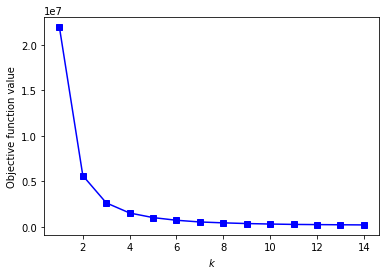

In [668]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 15):
    Z = KMeans(n_clusters=k, 
               init = 'random',
               n_init = 10,
               max_iter = 100).fit(x_train)
    inertia.append(Z.inertia_)

plt.plot(range(1, 15), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
# plt.axvline(c='r')
plt.show()

In [669]:
from sklearn.metrics import silhouette_samples, silhouette_score

Silhouette Score
Silhouette Coefficient for 2 clusters: 0.6167559315529694
Silhouette Coefficient for 3 clusters: 0.5631207159421495
Silhouette Coefficient for 4 clusters: 0.5398249578801031
Silhouette Coefficient for 5 clusters: 0.5157849334169395
Silhouette Coefficient for 6 clusters: 0.5067545640158124
Silhouette Coefficient for 7 clusters: 0.5016426563129585
Silhouette Coefficient for 8 clusters: 0.48566177608050776
Silhouette Coefficient for 9 clusters: 0.4682585009179948
Silhouette Coefficient for 10 clusters: 0.4576952177845197
Silhouette Coefficient for 11 clusters: 0.4508157647657096
Silhouette Coefficient for 12 clusters: 0.4355010428743627
Silhouette Coefficient for 13 clusters: 0.41367371715427864
Silhouette Coefficient for 14 clusters: 0.3934330097970034


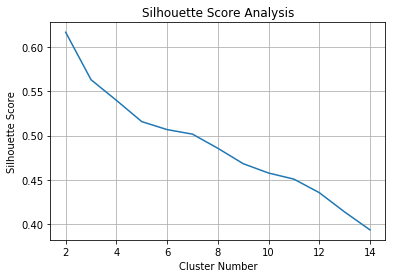

In [671]:
print("Silhouette Score") 
silhouette_scores_list = [] 

for cluster_number in range(2, 15): 
    kMInstance = KMeans(n_clusters=cluster_number, init='k-means++', n_init=10) 
    kMInstance.fit(x_train) 
    current_silhouette_score = silhouette_score(x_train, kMInstance.labels_, metric='euclidean', sample_size=10000) 
    silhouette_scores_list.append((cluster_number, current_silhouette_score)) 
    print("Silhouette Coefficient for {} clusters: {}".format(cluster_number, current_silhouette_score)) 

plt.plot(list(map(lambda x : x[0], silhouette_scores_list)), 
list(map(lambda x : x[1], silhouette_scores_list))) 

plt.xlabel('Cluster Number') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Score Analysis') 
plt.grid(True) 
plt.show()